# **Evaluating the results while using Label Encoder, get_dummies e One Hot Encoder.**

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
# Creating the DataFrame with pandas
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data_mining01/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [249]:
# Dropping the ID column directly from the original DataFrame to avoid overfitting and unnecessary data
df.drop(['Booking_ID'], axis = 1, inplace = True)

In [250]:
# Getting the informations about the datatype, null values and other aspects that could be important to filter the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

**Analysing the object columns to see how they are organized**

In [251]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [252]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [253]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [254]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

# **USING LABEL ENCODER**

In [255]:
# Generating the object LabelEncoder
labelEncoder = LabelEncoder()

# Creating a copy of the original DataFrame
df_label = df.copy()

# Applying the LabelEncoder to the copy of the DataFrame
df_label['type_of_meal_plan'] = labelEncoder.fit_transform(df_label['type_of_meal_plan'])
df_label['room_type_reserved'] = labelEncoder.fit_transform(df_label['room_type_reserved'])
df_label['market_segment_type'] = labelEncoder.fit_transform(df_label['market_segment_type'])
df_label['booking_status'] = labelEncoder.fit_transform(df_label['booking_status'])

**Analysing the DataFrame already converted with LabelEncoder**

In [256]:
df_label['type_of_meal_plan'].unique()

array([0, 3, 1, 2])

In [257]:
df_label['room_type_reserved'].unique()

array([0, 3, 1, 5, 4, 6, 2])

In [258]:
df_label['market_segment_type'].unique()

array([3, 4, 2, 0, 1])

In [259]:
df_label['booking_status'].unique()

array([1, 0])

In [260]:
# Printing the head of the DataFrame manipulated with LabelEncoder to see the results
df_label.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


# **USING GET DUMMIES**

In [261]:
# Creating a copy of the original DataFrame to apply Get Dummies
df_getdummies = df.copy()

# Using pandas to apply getdummies and creating a new DataFrame
df_getdummies = pd.get_dummies(data = df_getdummies, columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
df_getdummies.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,False,True,False,False,True
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,True,False,True
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,False,True,True,False
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,True,True,False
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,True,True,False


In [262]:
# Analysing the new columns created with the get dummies
df_getdummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

# **USING ONE HOT ENCODER**

In [263]:
# Selecting the columns with the 'object' as datatype
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [264]:
# Creating a copy of the original DataFrame to apply OneHotEncoder
df_onehot = df.copy()

# Using the Encoder
encoder = OneHotEncoder()

one_hot_encoded = encoder.fit_transform(df_onehot[categorical_columns])

In [265]:
# Transforming the enconded data to array
one_hot_encoded.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [266]:
# Transforming the data just encoded in a DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out())
one_hot_encoded_df

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
36272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36273,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [267]:
# Analysing general informations of the new DataFrame
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   type_of_meal_plan_Meal Plan 1      36275 non-null  float64
 1   type_of_meal_plan_Meal Plan 2      36275 non-null  float64
 2   type_of_meal_plan_Meal Plan 3      36275 non-null  float64
 3   type_of_meal_plan_Not Selected     36275 non-null  float64
 4   room_type_reserved_Room_Type 1     36275 non-null  float64
 5   room_type_reserved_Room_Type 2     36275 non-null  float64
 6   room_type_reserved_Room_Type 3     36275 non-null  float64
 7   room_type_reserved_Room_Type 4     36275 non-null  float64
 8   room_type_reserved_Room_Type 5     36275 non-null  float64
 9   room_type_reserved_Room_Type 6     36275 non-null  float64
 10  room_type_reserved_Room_Type 7     36275 non-null  float64
 11  market_segment_type_Aviation       36275 non-null  flo

# **TRAINING THE MODELS TO EACH ENCODING METHOD TO SEE WHAT IS THE BEST**

In [268]:
# Separating the data with different methods of encoding, one for each
X_labelencoder = df_label.drop('booking_status', axis = 1)
y_labelencoder = df_label['booking_status']

X_getdummies = df_getdummies.drop(['booking_status_Canceled', 'booking_status_Not_Canceled'], axis = 1)
y_getdummies = df_getdummies[['booking_status_Canceled', 'booking_status_Not_Canceled']]

X_onehot = one_hot_encoded_df.drop(['booking_status_Canceled', 'booking_status_Not_Canceled'], axis = 1)
y_onehot = one_hot_encoded_df[['booking_status_Canceled', 'booking_status_Not_Canceled']]

In [269]:
# Splitting data with the encoding methods, one for each
X_labelencoder_train, X_labelencoder_test, y_labelencoder_train, y_labelencoder_test = train_test_split(X_labelencoder, y_labelencoder, test_size = 0.2, random_state = 20)

X_getdummies_train, X_getdummies_test, y_getdummies_train, y_getdummies_test = train_test_split(X_getdummies, y_getdummies, test_size = 0.2, random_state = 20)

X_onehot_train, X_onehot_test, y_onehot_train, y_onehot_test = train_test_split(X_onehot, y_onehot, test_size = 0.2, random_state = 20)

In [270]:
# Pipeline to LabelEncoder
pipeline_labelencoder = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 20))
])

# Pipeline to get_dummies
pipeline_getdummies = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 20))
])

# Pipeline to OneHotEncoder
pipeline_onehot = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 20))
])

In [271]:
pipeline_labelencoder.fit(X_labelencoder_train, y_labelencoder_train)
y_pred_labelencoder = pipeline_labelencoder.predict(X_labelencoder_test)

accuracy_labelencoder = accuracy_score(y_labelencoder_test, y_pred_labelencoder)
print(f"Accuracy of LabelEncoder: {accuracy_labelencoder}")

report_labelencoder = classification_report(y_labelencoder_test, y_pred_labelencoder)
print('\n')
print(report_labelencoder)

Accuracy of LabelEncoder: 0.8996554100620262


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2430
           1       0.91      0.94      0.93      4825

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255



In [272]:
pipeline_getdummies.fit(X_getdummies_train, y_getdummies_train)
y_pred_getdummies = pipeline_getdummies.predict(X_getdummies_test)

accuracy_getdummies = accuracy_score(y_getdummies_test, y_pred_getdummies)
print(f"Accuracy of get_dummies: {accuracy_getdummies}")

report_getdummies = classification_report(y_getdummies_test, y_pred_getdummies)
print('\n')
print(report_getdummies)

Accuracy of get_dummies: 0.8981392143349414


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2430
           1       0.91      0.94      0.93      4825

   micro avg       0.90      0.90      0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255
 samples avg       0.90      0.90      0.90      7255



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [273]:
pipeline_onehot.fit(X_onehot_train, y_onehot_train)
y_pred_onehot = pipeline_onehot.predict(X_onehot_test)

accuracy_onehot = accuracy_score(y_onehot_test, y_pred_onehot)
print(f"Accuracy of OneHotEncoder: {accuracy_onehot}")

report_onehot = classification_report(y_onehot_test, y_pred_onehot)
print('\n')
print(report_onehot)

Accuracy of OneHotEncoder: 0.6691936595451413


              precision    recall  f1-score   support

           0       0.60      0.04      0.07      2430
           1       0.67      0.99      0.80      4825

   micro avg       0.67      0.67      0.67      7255
   macro avg       0.63      0.51      0.43      7255
weighted avg       0.65      0.67      0.55      7255
 samples avg       0.67      0.67      0.67      7255



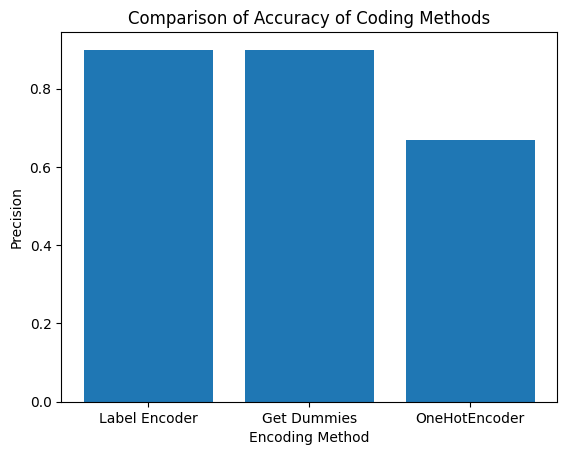

In [274]:
methods = ['Label Encoder', 'Get Dummies', 'OneHotEncoder']
accuracy = [accuracy_labelencoder, accuracy_getdummies, accuracy_onehot]

plt.bar(methods, accuracy)
plt.title('Comparison of Accuracy of Coding Methods')
plt.xlabel('Encoding Method')
plt.ylabel('Precision')
plt.show()

# **Checking whether there is an improvement in results from the application of the balancing technique with SMOTE and cross-validation sampling (KFold).**

In [275]:
# Checking the difference between the number of the samples in y
df['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


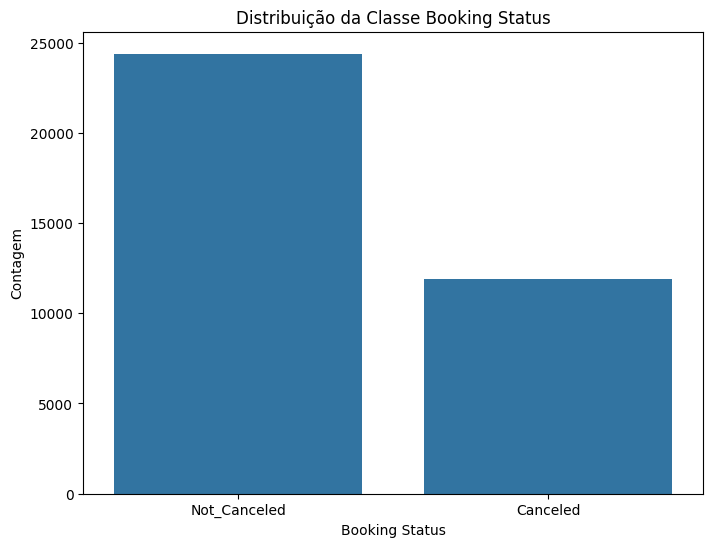

In [276]:
# Class distribution 'booking_status'
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_status', data=df)
plt.title('Distribuição da Classe Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Contagem')
plt.show()

In [277]:
# Creating the SMOTE object
sm = SMOTE()

# Balancing the classes for each encoder using SMOTE
X_labelencoder_resampled, y_labelencoder_resampled = sm.fit_resample(X_labelencoder, y_labelencoder)

X_getdummies_resampled, y_getdummies_resampled = sm.fit_resample(X_getdummies, y_getdummies['booking_status_Canceled'])

X_onehot_resampled, y_onehot_resampled = sm.fit_resample(X_onehot, y_onehot['booking_status_Canceled'])

In [278]:
y_labelencoder_resampled.value_counts()

,count
booking_status,
1,24390
0,24390


In [279]:
y_getdummies_resampled.value_counts()

,count
booking_status_Canceled,
False,24390
True,24390


In [280]:
y_onehot_resampled.value_counts()

,count
booking_status_Canceled,
0.0,24390
1.0,24390


In [281]:
X_labelencoder_train, X_labelencoder_test, y_labelencoder_train, y_labelencoder_test = train_test_split(X_labelencoder_resampled, y_labelencoder_resampled, test_size = 0.2, random_state = 20)

X_getdummies_train, X_getdummies_test, y_getdummies_train, y_getdummies_test = train_test_split(X_getdummies_resampled, y_getdummies_resampled, test_size = 0.2, random_state = 20)

X_onehot_train, X_onehot_test, y_onehot_train, y_onehot_test = train_test_split(X_onehot_resampled, y_onehot_resampled, test_size = 0.2, random_state = 20)

In [282]:
# Pipeline to LabelEncoder
pipeline_labelencoder = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 20))
])

# Pipeline to get_dummies
pipeline_getdummies = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 20))
])

# Pipeline to OneHotEncoder
pipeline_onehot = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 20))
])

In [283]:
pipeline_labelencoder.fit(X_labelencoder_train, y_labelencoder_train)
y_pred = pipeline_labelencoder.predict(X_labelencoder_test)

In [284]:
pipeline_getdummies.fit(X_getdummies_train, y_getdummies_train)
y_pred = pipeline_getdummies.predict(X_getdummies_test)

In [285]:
pipeline_onehot.fit(X_onehot_train, y_onehot_train)
y_pred = pipeline_onehot.predict(X_onehot_test)

In [286]:
RF = RandomForestClassifier()
kf = KFold(n_splits = 10, shuffle = True)
clf = cross_validate(
    RF,
    X_labelencoder_train,
    y_labelencoder_train,
    scoring = 'balanced_accuracy',
    cv = kf
)

print(f"{clf['test_score']}\nMean: {np.mean(clf['test_score'])}")

[0.92525689 0.92447577 0.91906193 0.92028009 0.91862631 0.91783402
 0.91259609 0.91449398 0.91766108 0.91269762]
Mean: 0.9182983776460883


In [287]:
RF = RandomForestClassifier()
kf = KFold(n_splits = 10, shuffle = True)
clf = cross_validate(
    RF,
    X_getdummies_train,
    y_getdummies_train,
    scoring = 'balanced_accuracy',
    cv = kf
)

print(f"{clf['test_score']}\nMean: {np.mean(clf['test_score'])}")

[0.93023933 0.92254213 0.92366697 0.92594643 0.91933367 0.92325823
 0.92528392 0.92226076 0.92111558 0.92738996]
Mean: 0.924103696442437


In [288]:
RF = RandomForestClassifier()
kf = KFold(n_splits = 10, shuffle = True)
clf = cross_validate(
    RF,
    X_onehot_train,
    y_onehot_train,
    scoring = 'balanced_accuracy',
    cv = kf
)

print(f"{clf['test_score']}\nMean: {np.mean(clf['test_score'])}")

[0.57110199 0.56349364 0.56856005 0.55732033 0.5676389  0.55766694
 0.56812711 0.56332577 0.57340639 0.57785233]
Mean: 0.5668493445077333
